# PA 3: Association Analysis - Apriori Algorithm

## Student Details

Student Name and ID: KAILASH SHANKAR BHANUSHALI / 1001398090


## Submission Instructions


Step 1: Create a folder and name it 'yourNetID_PA3'

Step 2: Rename this submission file as 'yourNetID_PA3.ipynb' and place it inside the folder 'yourNetID_PA3'

Step 3: Rename the updated dataset file 'dataset.csv' and place it inside the folder 'yourNetID_PA3'  

Step 4: Your submission folder should include ONLY the following files:
    * apriory.py,
    * yourNetID_PA3.ipynb, 
    * dataset.csv,
    * toyDS.csv

Step 5: Zip this folder and submit it on BB. Your final submission folder name should be 'yourNetID_PA3.ZIP'


## Programming Assignment Details

Before you start:
- Note that this is an individual assignment.
- Be familiar with the algorithm and with the dataset.
- If you use external sources make sure that you cite them, and be specific! 
- Make sure that your code is running before you upload your submission file. TA will not debug your code.
- Start early!


For this assignment, you will have to use:
* Jupyter notebook, 
* the 'Random Shopping cart' dataset [01],
* and the Apriori Algorithm (apriory.py)[02]. Note that the apriory.py file is modified to run with Python 3.

## - - - - - - - - - - - - - - - - - - - - - - - SOLUTION - - - - - - - - - - - - - - - - - - - - - - -

In [ ]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

In [1]:
# Import your Libraries
import csv
import pandas as pd


### Task 1: DataSet Preprocess
Before you start you need to modify your dataset 'dataset_group.csv' to look like the toyDS.csv.  Each transaction is at one line with a variable length.  Discard the date attribute (1st attribute) from your dataset.  For example, in your dataset transaction#4 should look like: 
    
    cereals,juice,lunch meat,soda,toilet paper,all-purpose

Export your modified dataset in a file named 'dataset.csv'.

Use pandas to Read and Print the first 7 transactions of the 'dataset.csv'.


ScreenShot of the toyDS.csv


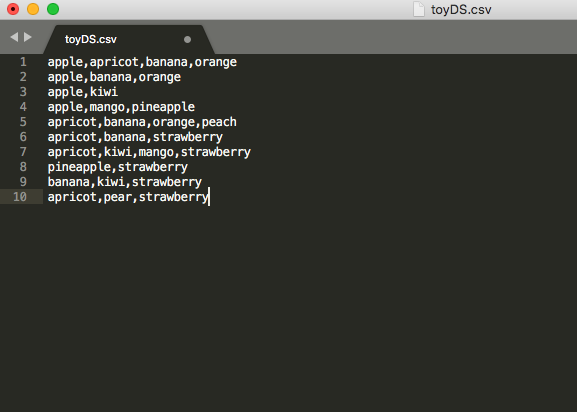

In [2]:
from IPython.display import Image
print ('ScreenShot of the toyDS.csv')
Image("SampleScreen01.png")

In [11]:
# # # # # # # # #  Code for Task 1 # # # # # # # # #
df=pd.DataFrame(pd.read_csv("dataset_group.csv"))
df.columns = ['utime', 'ID','name'] #take the columns which is required to process
dfset=df.drop('utime',1).groupby('ID') #drop the time column as its not required
transactitems={}
l=list()
i=1 #initialize the variable
for key, item in dfset:
    transactitems[i]=dfset.get_group(key).reset_index().name #change the index as to our column 
    i=i+1    
for key,value in transactitems.items():
    transactitems=pd.DataFrame(value)
    transactitems.columns=['item']
    l.append(','.join(list(set(transactitems.reset_index().item.tolist())))) # fetching the items and resetting index and converting to list with , as delimiter
with open('dataset.csv', "w") as pf: #writing into dataset file
        for data in l:
            pf.write(data + "\n")    
    
    
    
   
    
    
    




In [10]:
# # #  Solution  # # #
i=0
with open('dataset.csv', 'r') as csvFile: #reading from dataset file
    reader = csv.reader(csvFile)
    for row in reader:
        if i < 7:
            print("Entry",(i+1),": "+str(row).replace("'","").strip('\[').strip('\]')+"\n") #printing manipulation for clean display
            i = i+1

csvFile.close()


Entry 1 : butter, flour, vegetables, mixes, soap, soda, dinner rolls, shampoo, aluminum foil, beef, sandwich bags, ice cream, laundry detergent, all- purpose, yogurt, lunch meat, pork

Entry 2 : dishwashing liquid/detergent, vegetables, mixes, tortillas, shampoo, toilet paper, cheeses, aluminum foil, waffles, sandwich bags, individual meals, laundry detergent, cereals, milk, yogurt, hand soap

Entry 3 : ketchup, vegetables, soap, spaghetti sauce, soda, dinner rolls, poultry, shampoo, toilet paper, cheeses, bagels, ice cream, sandwich loaves, eggs, cereals, laundry detergent, milk, lunch meat, hand soap, pork

Entry 4 : soda, toilet paper, juice, cereals, all- purpose, lunch meat

Entry 5 : flour, mixes, tortillas, pasta, vegetables, spaghetti sauce, poultry, dinner rolls, soda, toilet paper, waffles, sandwich loaves, eggs, paper towels, individual meals, all- purpose, milk, yogurt, hand soap, pork

Entry 6 : butter, dishwashing liquid/detergent, vegetables, soap, pasta, spaghetti sauce

### Task 2: Run apriory.py and Evaluate Results 

In this task, you have to find how you will be able to execute and print apriory results by making use only the apriory.py. In other words "DO NOT USE ANY OTHER LIBRARY FOR TASK 2!!!". 

(*) For those that are not familiar with python and coding this could be a quite demanding task.


You will have to execute apriori algorithm "3" times for different combinations of support and confidence.
Print the results of apriory for 'dataset.csv' by making use ONLY the provided methods. 

Do not forget to add your reasoning (explain the result outcome) at the top of each case in a nice and readable way. 

You are allowed to use the python print method to print your results. DO NOT add your reasoning as comments. 


In [9]:
import apriori as ap
minSupport = 0.17
minConfidence = 0.68
inFile = ap.dataFromFile('dataset.csv')
items, rules = ap.runApriori(inFile, minSupport, minConfidence) #running apriori with the help of min support and min confidence
print ('# # # # # # # # #  Code for Task 2, Case:1 # # # # # # # # #') 
print ('Case 1 (minimum support=0.17 and minimum confidence=0.68)')

print ('Case 1 Reasoning: After intensive training, we are able to find the average number of rules which satisfies the condition, which we can able to acheive only when min supp is kept between 0.1 and 0.2, and min conf must be between 0.5 to 0.7 and these rules perfectly satisfies the association rule condition')

print ('Case 1 Output:')
ap.printResults(items, rules)


# # # # # # # # #  Code for Task 2, Case:1 # # # # # # # # #
Case 1 (minimum support=0.17 and minimum confidence=0.68)
Case 1 Reasoning: After intensive training, we are able to find the average number of rules which satisfies the condition, which we can able to acheive only when min supp is kept between 0.1 and 0.2, and min conf must be between 0.5 to 0.7 and these rules perfectly satisfies the association rule condition
Case 1 Output:

------------ITEMS-----------------
item: ('ice cream', 'paper towels') , 0.170
item: ('poultry', 'beef') , 0.170
item: ('milk', 'dishwashing liquid/detergent') , 0.170
item: ('poultry', 'individual meals') , 0.170
item: ('shampoo', 'juice') , 0.170
item: ('dishwashing liquid/detergent', 'eggs') , 0.171
item: ('poultry', 'spaghetti sauce') , 0.171
item: ('poultry', 'shampoo') , 0.171
item: ('cereals', 'dinner rolls') , 0.171
item: ('poultry', 'toilet paper') , 0.171
item: ('soda', 'dinner rolls') , 0.171
item: ('poultry', 'tortillas') , 0.171
item: ('ju

In [7]:
import apriori as ap
minSupp = 0.1
minConf = 0.8
inFile = ap.dataFromFile('dataset.csv')
items, rules = ap.runApriori(inFile, minSupp, minConf)
print ('# # # # # # # # #  Code for Task 2, Case:2 # # # # # # # # #') 
print ('Case 2 (minimum support=0.1 and minimum confidence=0.8)')

print ('Case 2 Reasoning: By keeping so low support, we are getting many rules which are incorrect from the analysis point of view, as it shows that if few of the items bought from the set then we can considered be as a rule which does not follows the associaton condition where it says that frequently all the items listed all together bought then only it should be considered to be an rule')

print ('Case 2 Output:')
ap.printResults(items, rules)

# # # # # # # # #  Code for Task 2, Case:2 # # # # # # # # #
Case 2 (minimum support=0.1 and minimum confidence=0.8)
Case 2 Reasoning: By keeping so low support, we are getting many rules which are incorrect from the analysis point of view, as it shows that if few of the items bought from the set then we can considered be as a rule which does not follows the associaton condition where it says that frequently all the items listed all together bought then only it should be considered to be an rule
Case 2 Output:

------------ITEMS-----------------
item: ('vegetables', 'fruits', 'pork') , 0.101
item: ('butter', 'vegetables', 'beef') , 0.101
item: ('butter', 'vegetables', 'hand soap') , 0.103
item: ('vegetables', 'hand soap', 'pork') , 0.104
item: ('vegetables', 'juice', 'fruits') , 0.105
item: ('flour', 'vegetables', 'hand soap') , 0.106
item: ('sandwich loaves', 'vegetables', 'pork') , 0.106
item: ('ice cream', 'vegetables', 'pork') , 0.106
item: ('flour', 'vegetables', 'spaghetti sauce'

In [8]:
import apriori as api
minSupport = 0.3
minConfidence = 0.6
inFile = ap.dataFromFile('dataset.csv') 
items, rules = ap.runApriori(inFile, minSupport, minConfidence)
print ('# # # # # # # # #  Code for Task 2, Case:3 # # # # # # # # #') 
print ('Case 3 (minimum support=0.3 and minimum confidence=0.6)')

print ('Case 3 Reasoning: Keeping minimum support high which states that at least that specific items should be brought more than 30% which ultimately going to reduce the number of rules, but keeping confidence on  lower side can gradually increase the number of rules but not that much as most of them has to satisfy min support first. This can give you the most frequent items bought, but it skips out average items as a result its incorrect to be so tight bounded for getting rules output which skips the average cases.')

print ('Case 3 Output:')
ap.printResults(items, rules)


# # # # # # # # #  Code for Task 2, Case:3 # # # # # # # # #
Case 3 (minimum support=0.3 and minimum confidence=0.6)
Case 3 Reasoning: Keeping minimum support high which states that at least that specific items should be brought more than 30% which ultimately going to reduce the number of rules, but keeping confidence on  lower side can gradually increase the number of rules but not that much as most of them has to satisfy min support first. This can give you the most frequent items bought, but it skips out average items as a result its incorrect to be so tight bounded for getting rules output which skips the average cases.
Case 3 Output:

------------ITEMS-----------------
item: ('vegetables', 'bagels') , 0.300
item: ('ice cream', 'vegetables') , 0.303
item: ('vegetables', 'soda') , 0.306
item: ('dishwashing liquid/detergent', 'vegetables') , 0.306
item: ('vegetables', 'dinner rolls') , 0.308
item: ('vegetables', 'cheeses') , 0.309
item: ('vegetables', 'laundry detergent') , 0.309
ite

# References

[01] https://www.kaggle.com/acostasg/random-shopping-cart

[02] https://github.com/asaini/Apriori


# Rubric
* [02 points] - Student Details 
* [08 points] - Comply with submission instructions 
* [30 points] - DataSet Preprocess 
* [30 points] - Run apriory.py
* [30 points] - Evaluate Results 
